# Exercise 4 : Linear Regression

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Problem 1 : Predicting SalePrice using GrLivArea

Note : We observed during EDA that `GrLivArea` and `SalePrice` have a strong linear relationship with correlation 0.71.

In this problem, you will build a Linear Regression model to predict `SalePrice` using `GrLivArea` and judge its accuracy.

In [48]:
house_price = pd.read_csv("train.csv")
house_price.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
404,405,60,RL,NaN,10364,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,168000
923,924,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,193000
645,646,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250
212,213,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,252678
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


In [49]:
gr_liv_area = house_price["GrLivArea"].to_frame()
sale_price = house_price["SalePrice"].to_frame()
trainDF = pd.concat([gr_liv_area, sale_price], axis=1)
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


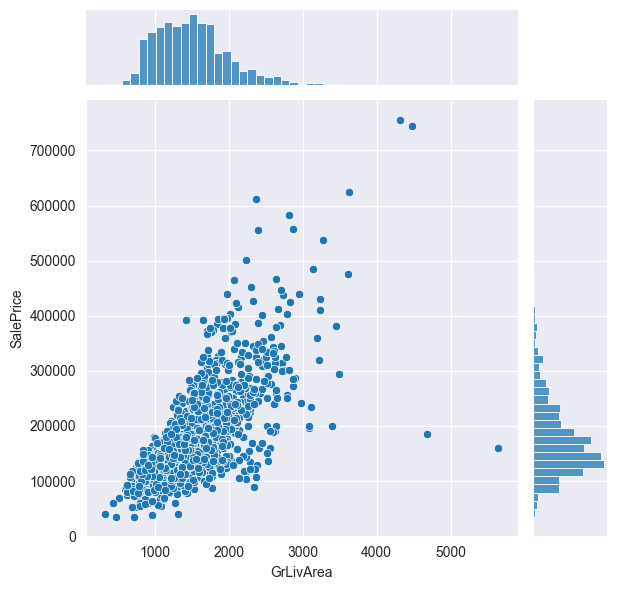

In [50]:
sns.jointplot(trainDF, x="GrLivArea", y="SalePrice")

### (a)

Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict `SalePrice` using `GrLivArea`. Print the coefficients of your model and plot the regression line.

Firstly, we split the data in to train and test.

In [51]:
gr_liv_area_train, gr_liv_area_test, sale_price_train, sale_price_test \
    = train_test_split(gr_liv_area, sale_price, test_size=0.2)
print("length of train =", len(gr_liv_area_train))
print("length of test =", len(gr_liv_area_test))
assert len(gr_liv_area_test) == len(sale_price_test)
assert len(gr_liv_area_train) == len(sale_price_train)

length of train = 1168
length of test = 292


Then, we try to calculate the formula of the regression line.

In [52]:
area_price_reg = LinearRegression().fit(gr_liv_area_train, sale_price_train)
print("Coefficient\t: a =", area_price_reg.coef_)
print("Intercept\t: b =", area_price_reg.intercept_)

Coefficient	: a = [[110.91052585]]
Intercept	: b = [13980.83107392]


Then plot the line.

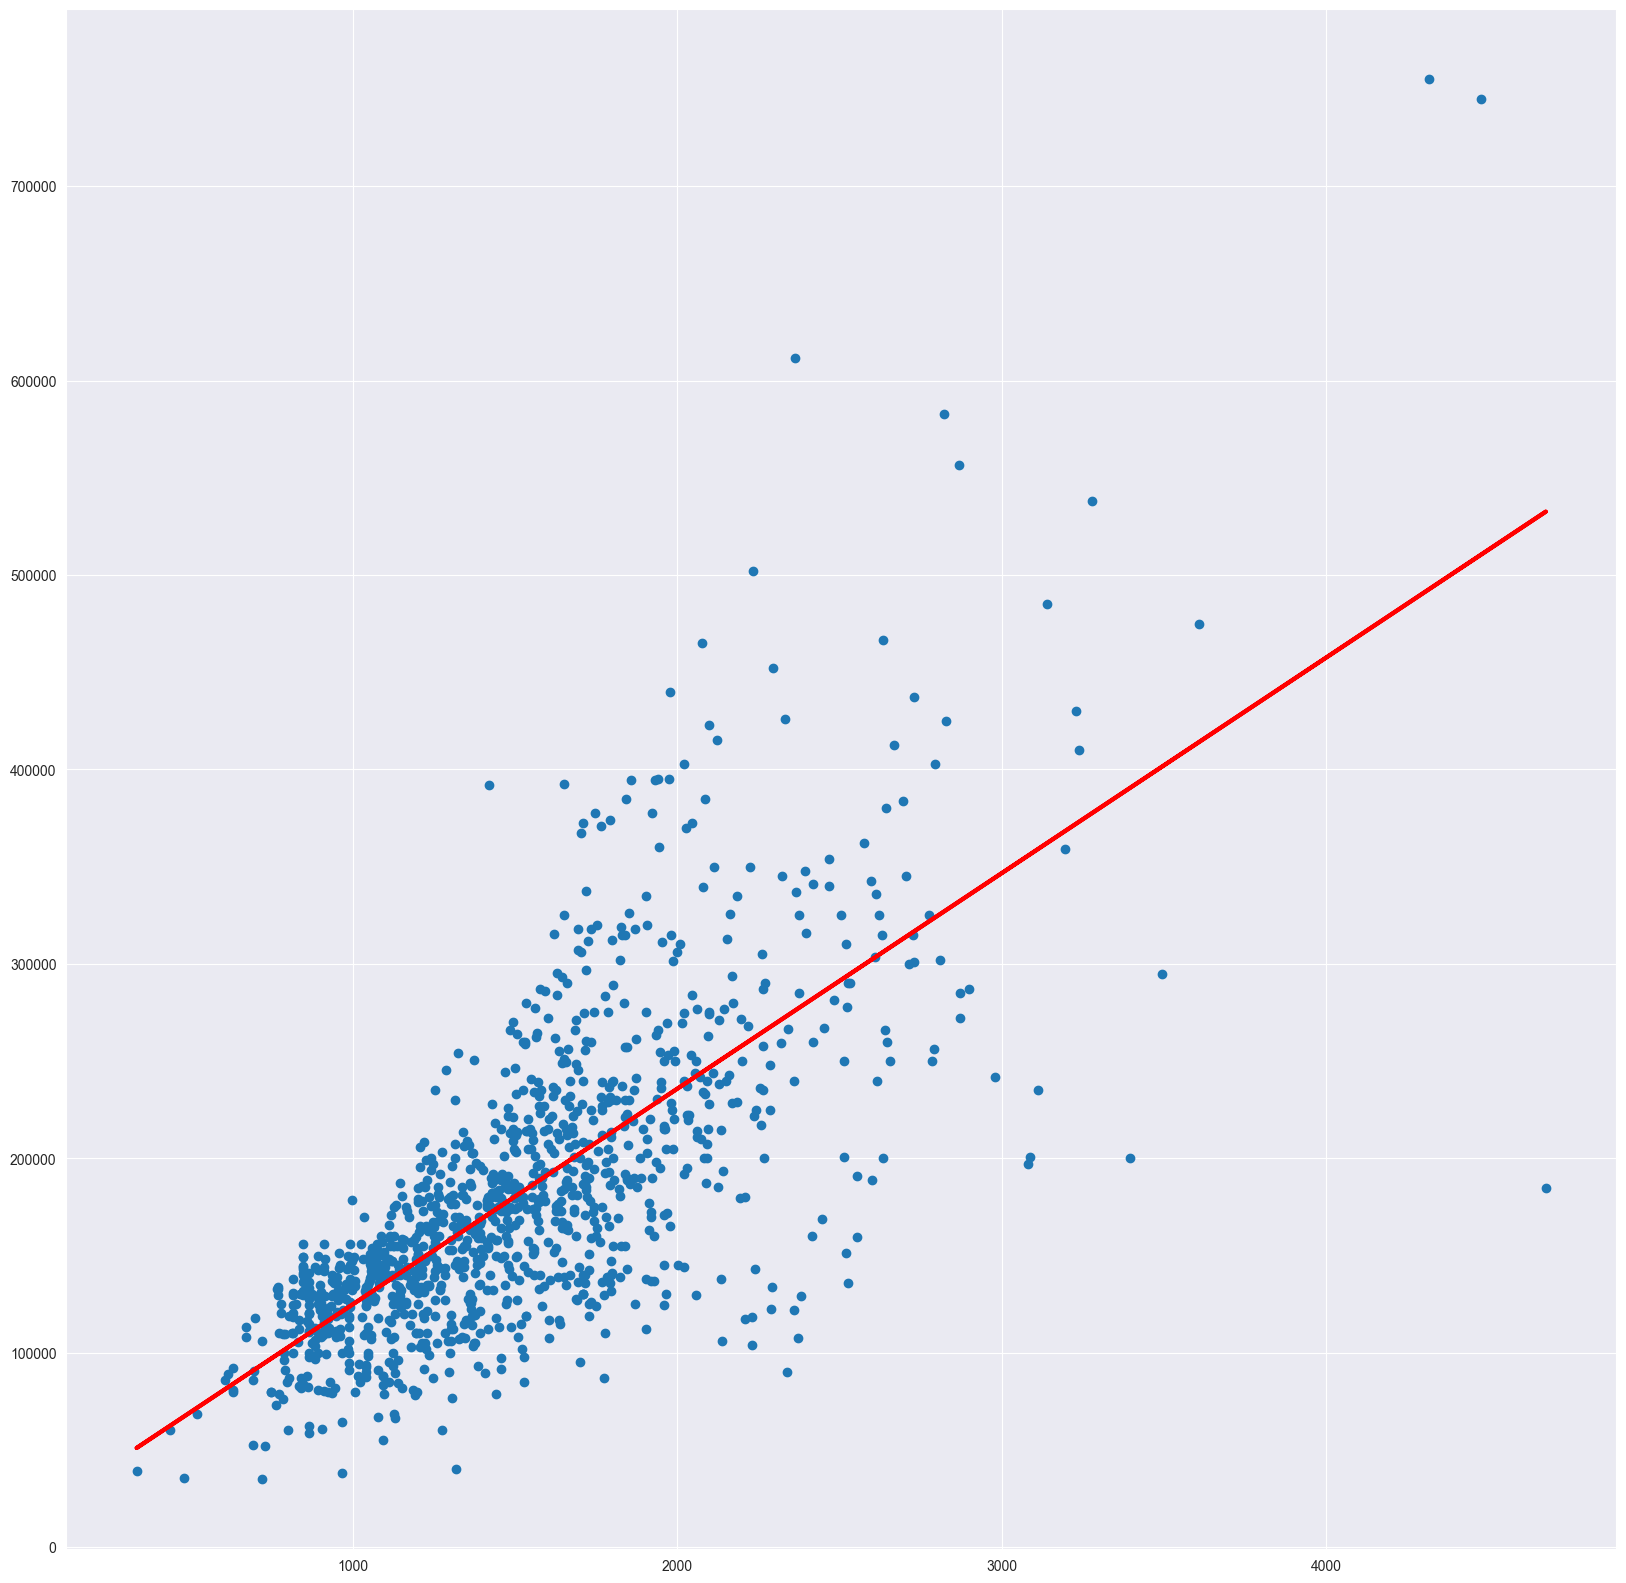

In [53]:
plt.figure(figsize=(20, 20))
plt.scatter(gr_liv_area_train, sale_price_train)
plt.plot(gr_liv_area_train, area_price_reg.predict(gr_liv_area_train), color='r', linewidth=3)

### (b)

Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

We use the model to predict the answer.

In [54]:
train_predict = area_price_reg.predict(gr_liv_area_train)
test_predict = area_price_reg.predict(gr_liv_area_test)

We try to get the MSE the explained variance to measure the Goodness for both Train set and Test set.

In [55]:
print("Goodness of Fit of Model", "Train Data Set", sep="\t")
print("MSE of train data set:", mean_squared_error(sale_price_train, train_predict), sep="\t")
print("Explained Variance of the train data set:\t", area_price_reg.score(gr_liv_area_train, sale_price_train),
      sep="\t")

print()

print("Goodness of Fit of Model", "Test Data Set", sep="\t")
print("MSE of test data set:", mean_squared_error(sale_price_test, test_predict), sep="\t")
print("Explained Variance of the test data set:", area_price_reg.score(gr_liv_area_test, sale_price_test), sep="\t")

Goodness of Fit of Model	Train Data Set
MSE of train data set:	3111753342.882107
Explained Variance of the train data set:		0.5147888322482392

Goodness of Fit of Model	Test Data Set
MSE of test data set:	3278421984.5785427
Explained Variance of the test data set:	0.4425522125373348


Then we try to plot the predictions vs true values.

Text(0, 0.5, 'Predicted values of the house price (Test)')

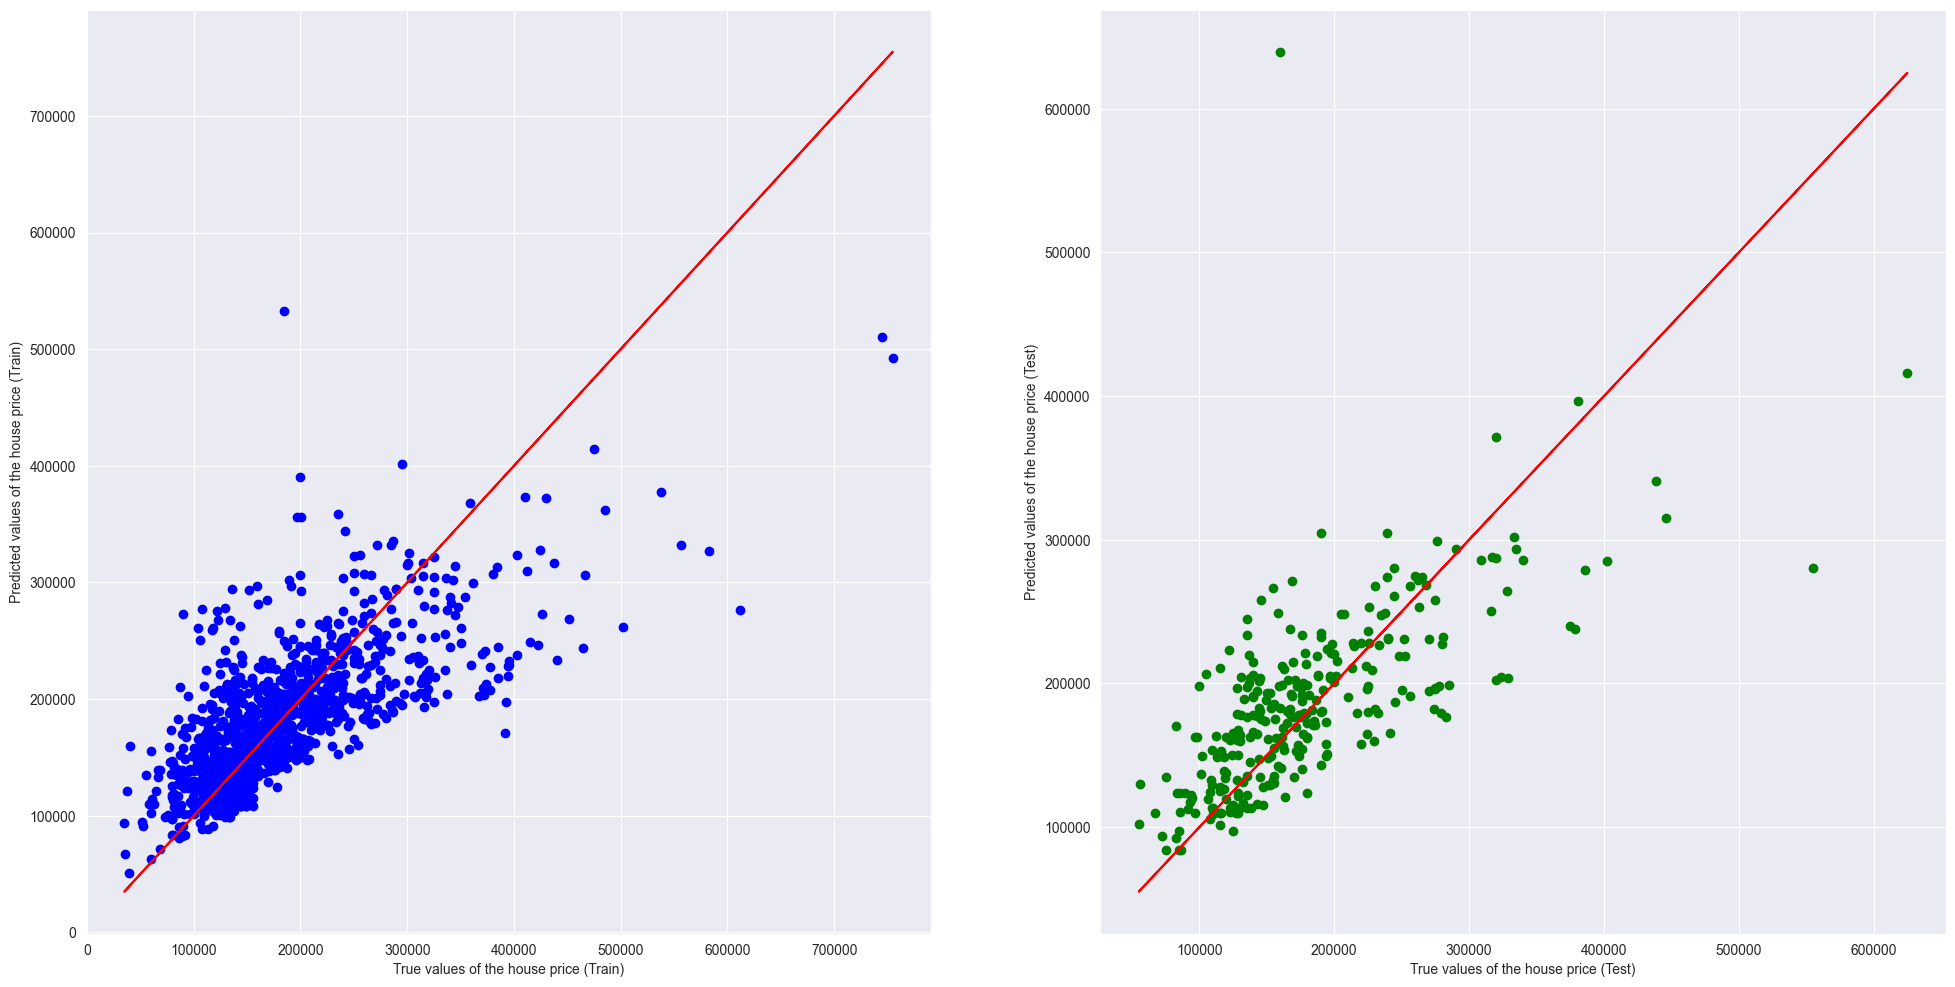

In [56]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(sale_price_train, train_predict, color="blue")
axes[0].plot(sale_price_train, sale_price_train, color="red")
axes[0].set_xlabel("True values of the house price (Train)")
axes[0].set_ylabel("Predicted values of the house price (Train)")

axes[1].scatter(sale_price_test, test_predict, color="green")
axes[1].plot(sale_price_test, sale_price_test, color="red")
axes[1].set_xlabel("True values of the house price (Test)")
axes[1].set_ylabel("Predicted values of the house price (Test)")

## Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables `TotalBsmtSF` and `GarageArea`, individually. Justify which of the three models is the best in this case.

We try to write a function to do regression on some variables in a given dataset.

In [57]:
def do_regression(x, y):
    """
    Performs linear regression on the given dataset.

    Args:
        x (pandas.DataFrame or pandas.Series): The input data for the predictor.
        y (pandas.DataFrame or pandas.Series): The data for the actual response variable.

    Returns:
        None.
    """

    if type(x) == pd.Series:
        x = x.to_frame()
    if type(y) == pd.Series:
        y = y.to_frame()

    # Split the data into training and testing sets
    x_test, x_train, y_test, y_train = train_test_split(x, y, train_size=0.8)

    # Fit a linear regression model to the training data
    linreg = LinearRegression().fit(x_train, y_train)

    # Print the coefficient and intercept of the regression line
    print("Coefficient: a =", linreg.coef_)
    print("Intercept: b =", linreg.intercept_)
    print()

    # Use the model to make predictions
    y_train_predict = linreg.predict(x_train)
    y_test_predict = linreg.predict(x_test)

    # Plot the regression line
    plt.figure(figsize=(20, 20))
    plt.scatter(x_train, y_train, color="green")
    plt.plot(x_train, y_train_predict, color="red")

    # Evaluate the goodness of the model using the training data and the test data
    print("Goodness of Fit of Model - Train Data Set")
    print("MSE of train data set:", mean_squared_error(y_train, y_train_predict))
    print("Explained Variance of the train data set:", linreg.score(x_train, y_train))

    print()

    print("Goodness of Fit of Model - Test Data Set")
    print("MSE of test data set:", mean_squared_error(y_test, y_test_predict))
    print("Explained Variance of the test data set:", linreg.score(x_test, y_test))

Then we use this function to predict `SalePrice` using the variables `TotalBsmtSF` and `GarageArea` individually.

Coefficient: a = [[130.83265804]]
Intercept: b = [42098.14597067]

Goodness of Fit of Model - Train Data Set
MSE of train data set: 3159016640.801365
Explained Variance of the train data set: 0.4583005583178047

Goodness of Fit of Model - Test Data Set
MSE of test data set: 4219552803.8631616
Explained Variance of the test data set: 0.34301966564418074


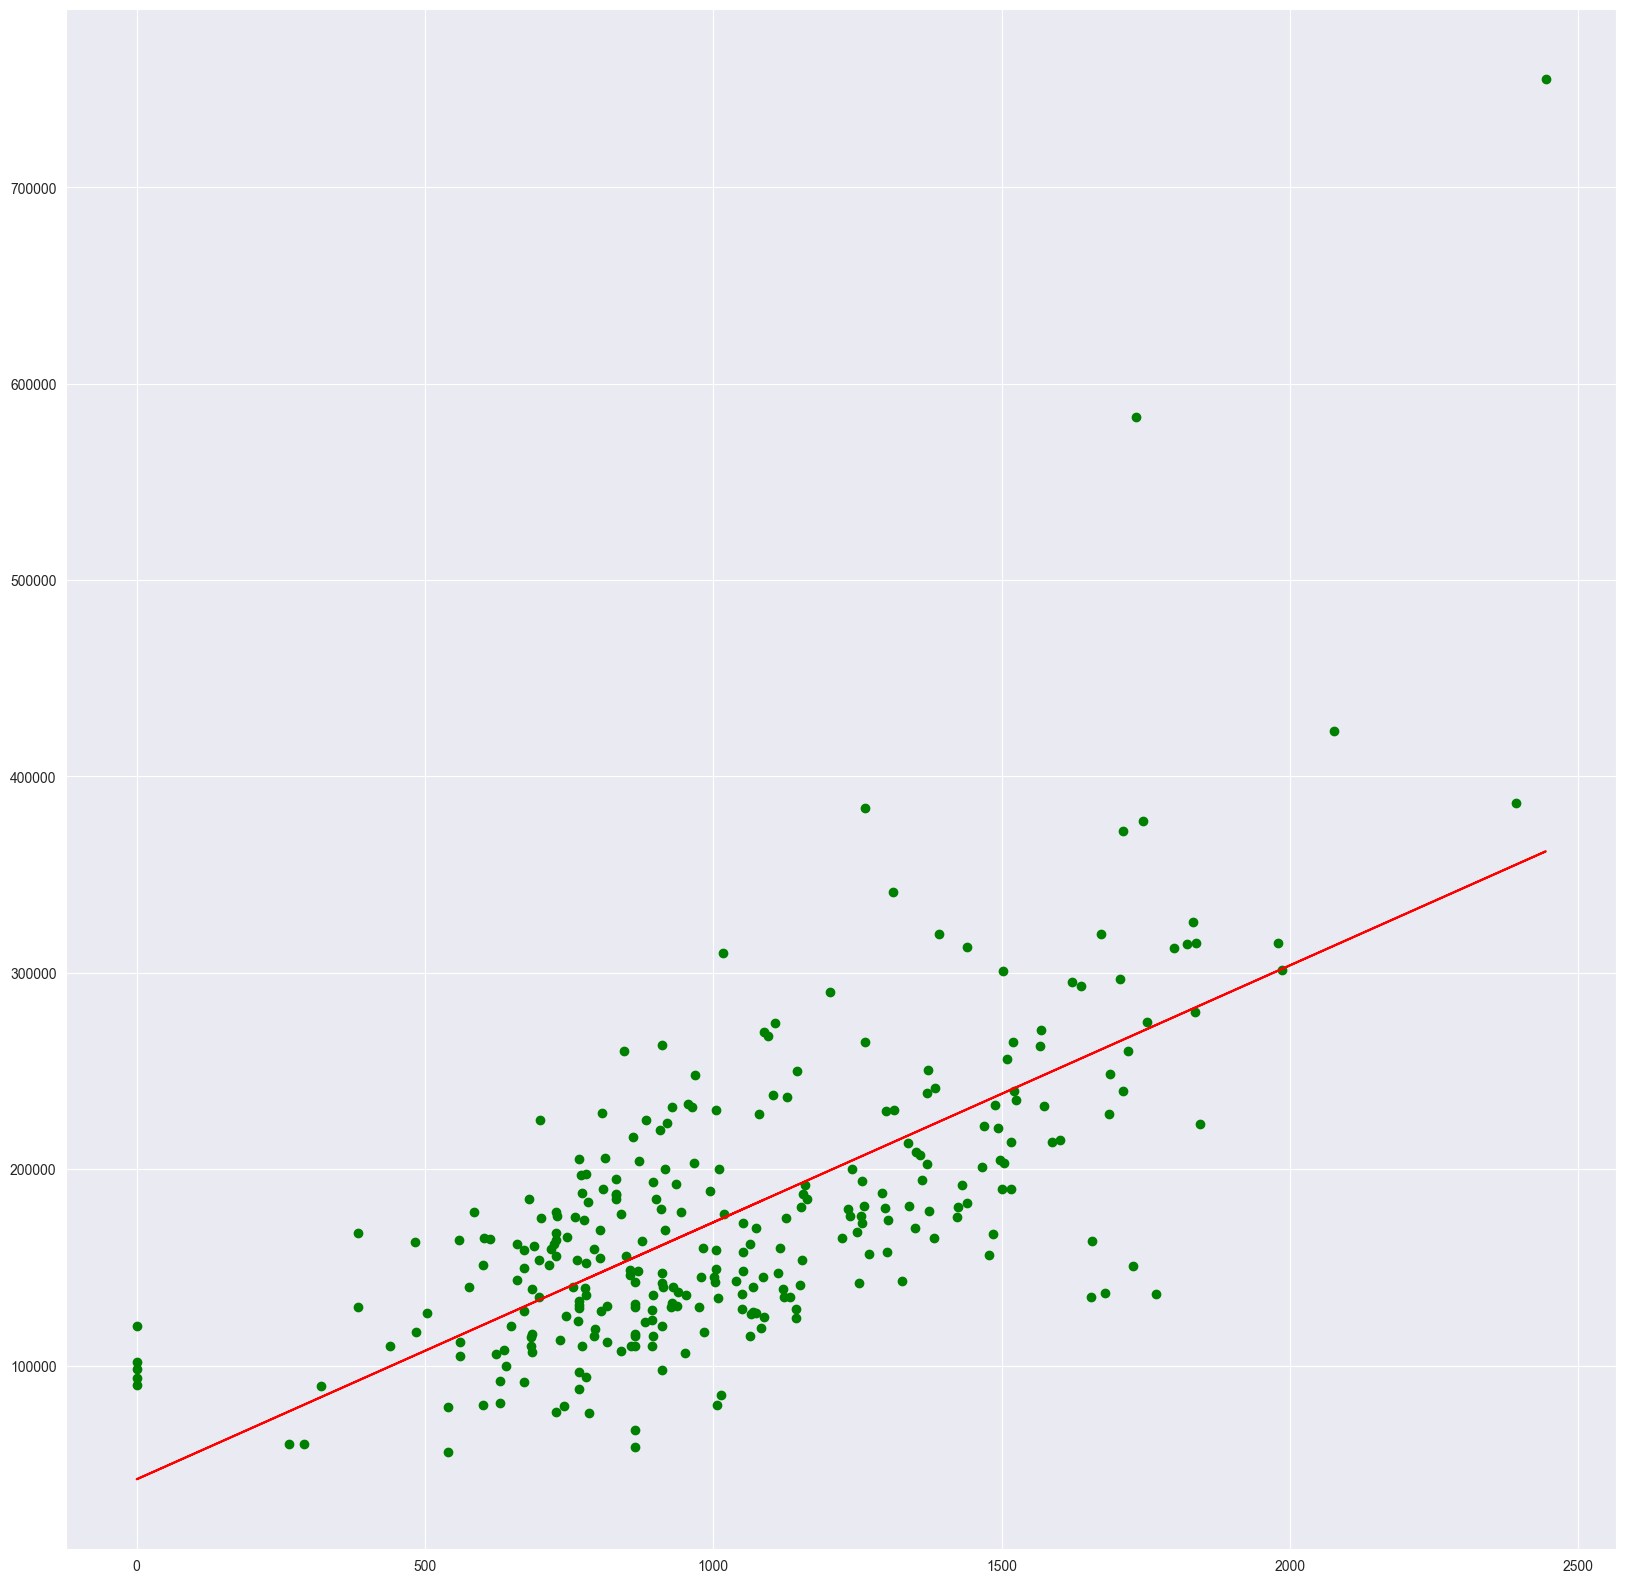

In [58]:
do_regression(house_price["TotalBsmtSF"], house_price["SalePrice"])

Coefficient: a = [[228.02561517]]
Intercept: b = [74938.48243459]

Goodness of Fit of Model - Train Data Set
MSE of train data set: 2966514274.670884
Explained Variance of the train data set: 0.42159900263679495

Goodness of Fit of Model - Test Data Set
MSE of test data set: 4082922453.440867
Explained Variance of the test data set: 0.3814168932256735


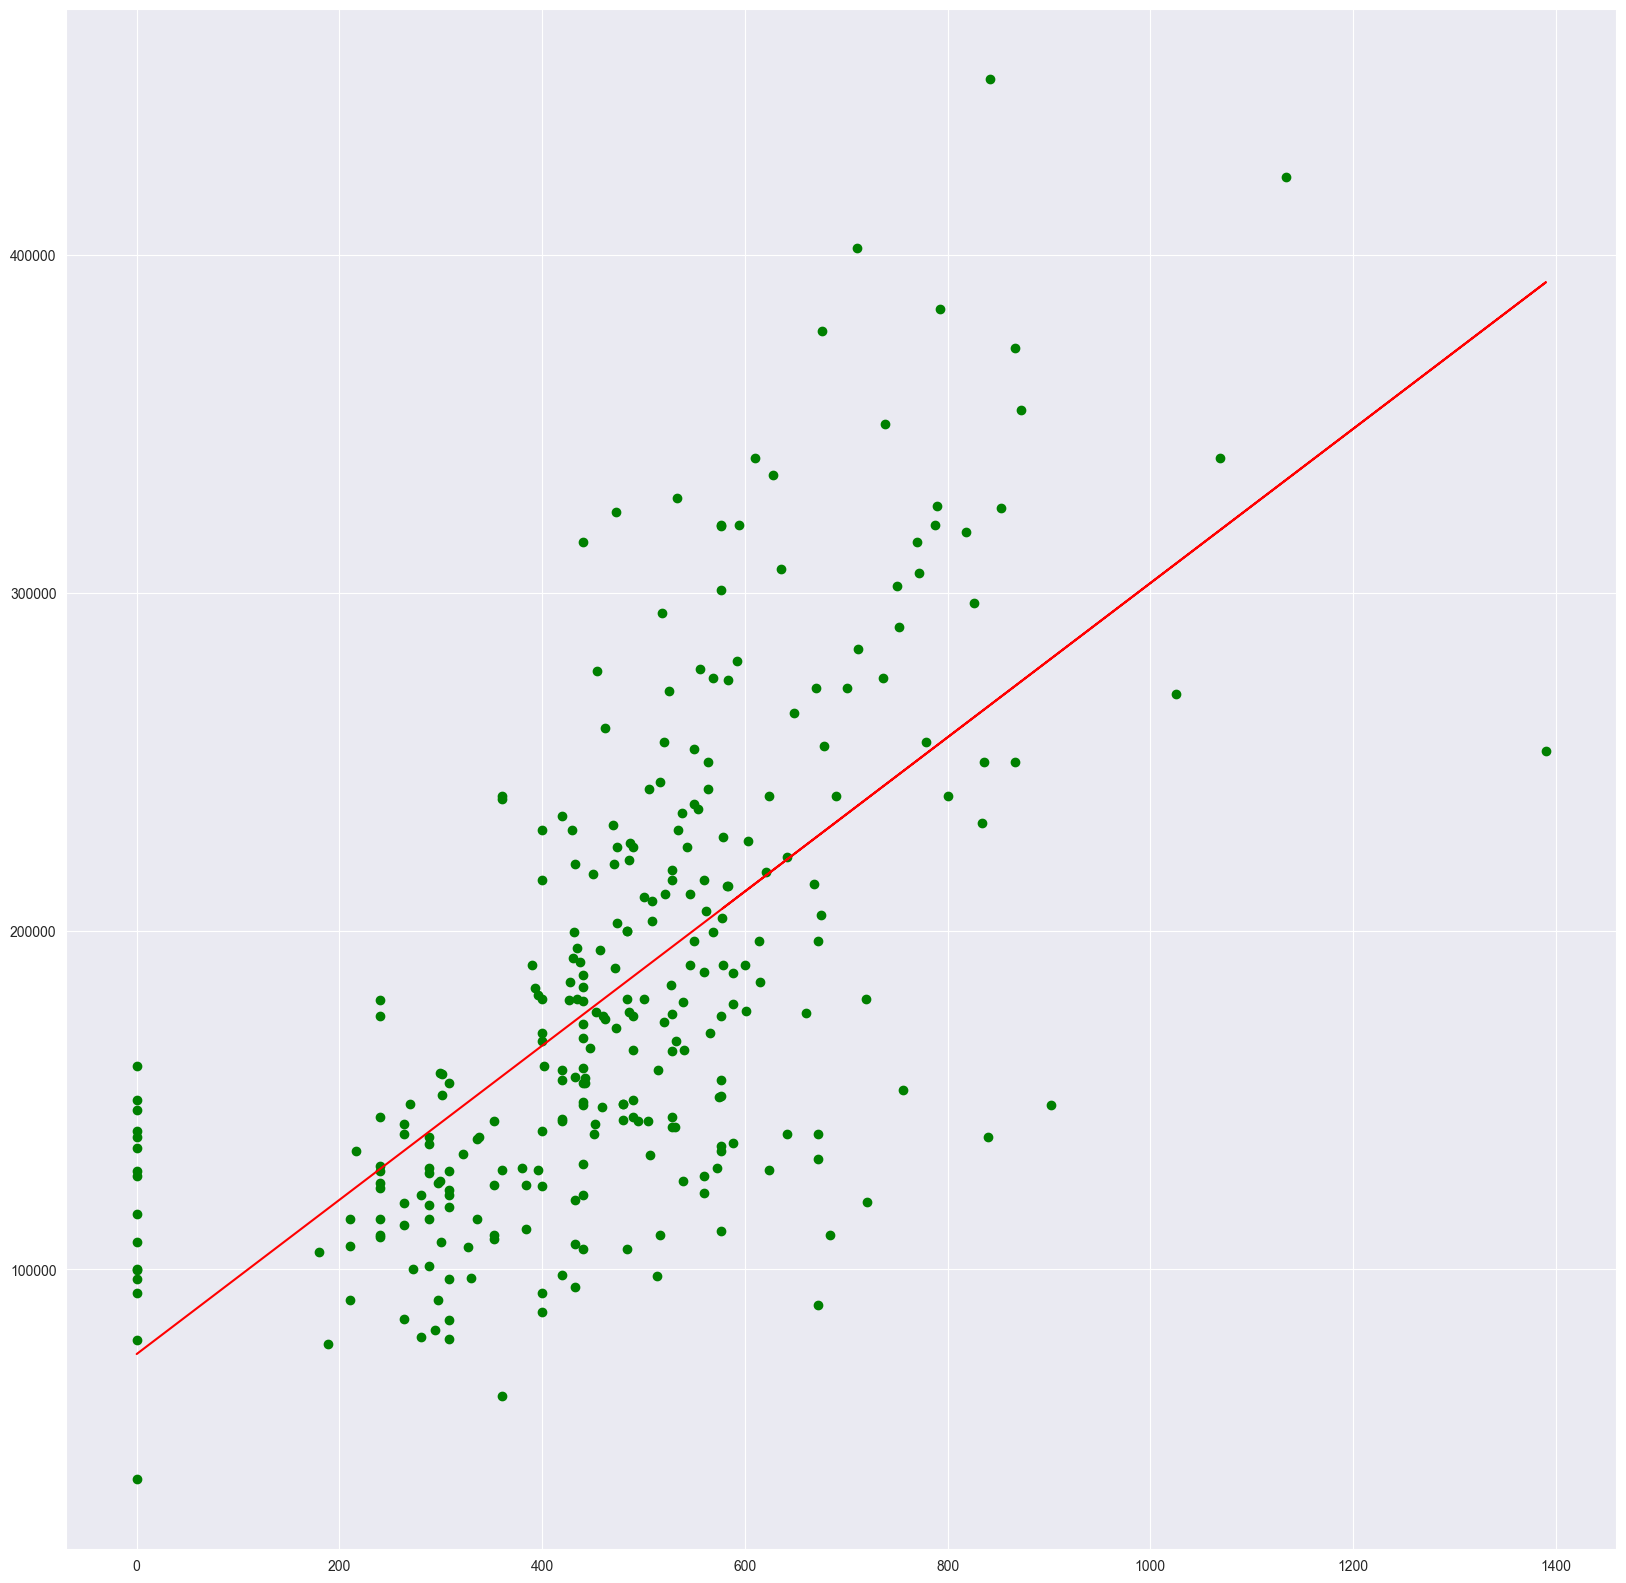

In [59]:
do_regression(house_price["GarageArea"], house_price["SalePrice"])

Comparing the three variables, we found that `GrLivArea` is the best.

## Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

### (a)

Find the houses (rows) that are “outliers” for `GrLivArea` and/or `SalePrice`. This means outliers for `GrLivArea` UNION outliers for `SalePrice` in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [60]:
def check_outliers(var: pd.Series) -> pd.Series:
    """
    Check whether each value is an outlier for a `Series`
    """
    Q1 = var.quantile(0.25)
    Q3 = var.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (lower_bound <= var) & (var <= upper_bound)


house_price_cleaned = house_price[check_outliers(house_price["GrLivArea"]) & check_outliers(house_price["SalePrice"])][["GrLivArea", "SalePrice"]]

house_price_cleaned.describe()

,GrLivArea,SalePrice
count,1383.000000,1383.000000
mean,1453.518438,169306.211858
std,434.424442,58693.656943
min,334.000000,34900.000000
25%,1116.500000,128500.000000
50%,1431.000000,158500.000000
75%,1719.500000,202150.000000
max,2730.000000,340000.000000


### (b)

In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict `SalePrice` using `GrLivArea`. Print the model coefficients and plot the regression line.

Coefficient: a = [[91.44784739]]
Intercept: b = [34439.92627064]

Goodness of Fit of Model - Train Data Set
MSE of train data set: 1954388285.2746146
Explained Variance of the train data set: 0.45395684384878143

Goodness of Fit of Model - Test Data Set
MSE of test data set: 1766220328.7042804
Explained Variance of the test data set: 0.48135726281625824


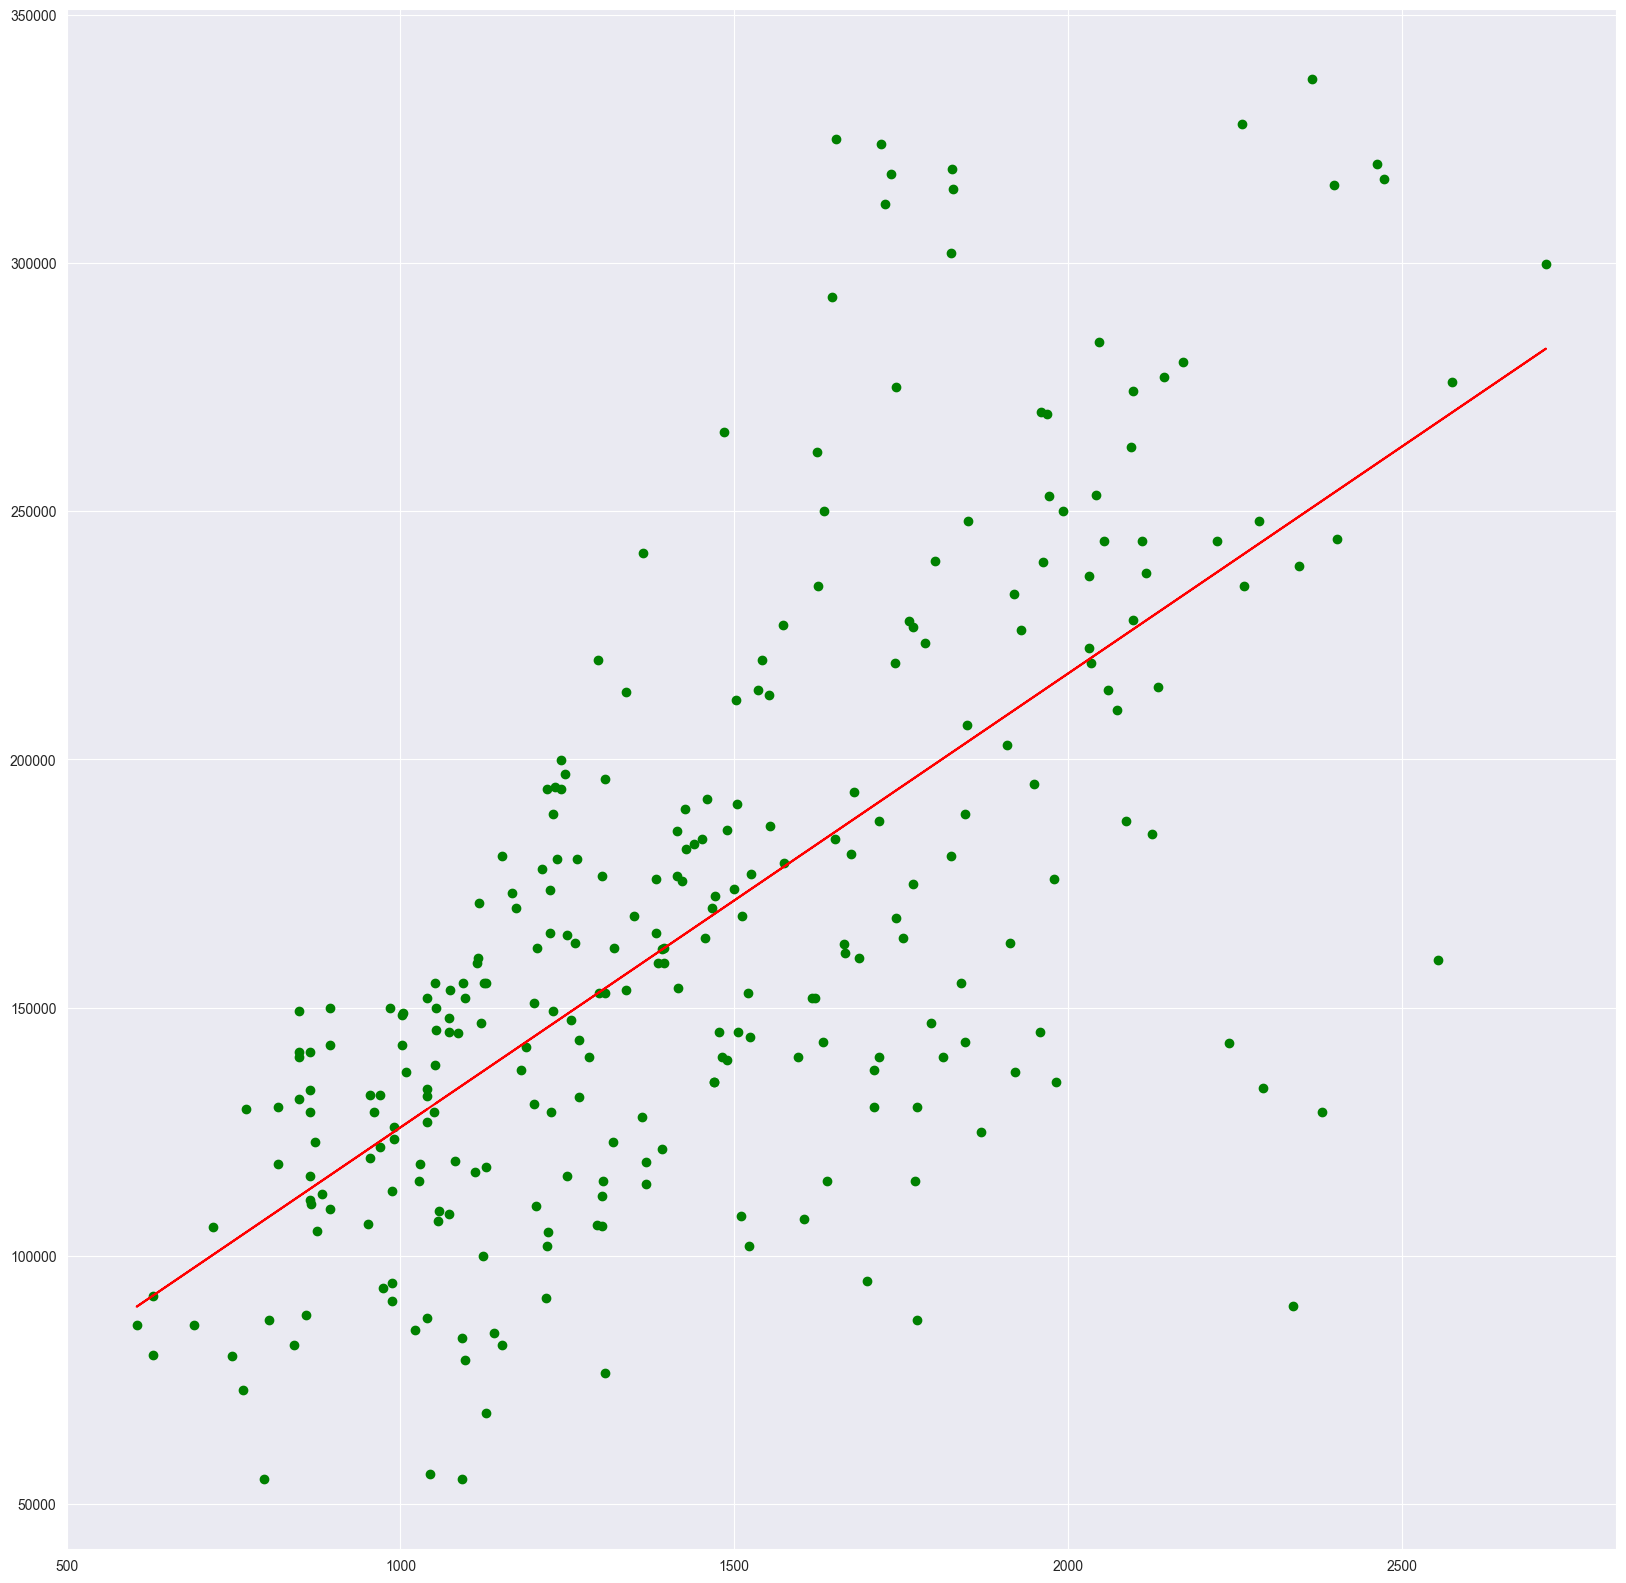

In [61]:
do_regression(house_price_cleaned["GrLivArea"], house_price_cleaned["SalePrice"])

### (c)

Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

The goodness is printed in (b), we found that the MSE if much lower than problem 1. Although the explained variance seems not affect so much (It may be that these points also greatly affect the variance). Therefore, I think it can be said that the prediction is more accurate after removing the outliers.